In [ ]:
#Importing all the necessary libraries in this section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
#Code section to upload local files to google drive
from google.colab import files
#uploaded = files.upload()#uncomment to upload a local file

In [ ]:
dataset = pd.read_excel("telstradataset.xlsx")
dataset.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,AverageSentiment_tweets,Two_day_sentiment_tweets,Three_day_sentiment_tweets,AverageSentimentNews,Two_day_sentiment_news
0,2018-01-02,3.64,3.675,3.630,3.66,3.425345,8990912,0.127597,0.472365,0.588664,0.000000,0.000000
1,2018-01-03,3.67,3.685,3.645,3.66,3.425345,12418563,0.021953,0.247159,0.428719,0.000000,0.000000
2,2018-01-04,3.68,3.690,3.670,3.68,3.444062,12158560,0.028536,0.137848,0.348640,0.000000,0.000000
3,2018-01-05,3.70,3.730,3.690,3.73,3.490857,18064317,0.337952,0.237900,0.371770,0.000000,0.000000
4,2018-01-08,3.74,3.760,3.730,3.75,3.509574,18490173,-0.401830,-0.090280,-0.050480,0.096608,0.096608
5,2018-01-09,3.77,3.785,3.750,3.75,3.509574,25741244,0.058605,-0.033230,0.063949,0.051350,0.073979
6,2018-01-10,3.78,3.780,3.700,3.71,3.472139,29423537,0.041660,0.004215,0.018377,0.000000,0.000000
7,2018-01-11,3.70,3.735,3.680,3.71,3.472139,15919079,0.260088,0.132151,0.114138,-0.200950,-0.200950
8,2018-01-12,3.73,3.750,3.700,3.74,3.500216,26797583,-0.475140,-0.171500,-0.114210,0.110332,-0.045309
9,2018-01-15,3.75,3.760,3.700,3.71,3.472139,14124236,0.023075,-0.031640,-0.032650,0.025000,0.183511


In [ ]:
training_set = dataset
training_set.describe()#Display the statistics of the dataset

,Open,High,Low,Close,Adj Close,Volume,AverageSentiment_tweets,Two_day_sentiment_tweets,Three_day_sentiment_tweets,AverageSentimentNews,Two_day_sentiment_news
count,761.000000,761.000000,761.000000,761.000000,761.000000,7.610000e+02,761.000000,761.000000,761.000000,761.000000,761.000000
mean,3.270539,3.301380,3.240736,3.272017,3.159929,2.907550e+07,0.105556,0.094729,0.097954,0.044543,0.037431
std,0.337309,0.338043,0.335868,0.337741,0.330581,1.488642e+07,0.248223,0.144423,0.111183,0.142651,0.111218
min,2.620000,2.640000,2.600000,2.620000,2.476862,3.164766e+06,-0.790670,-0.342730,-0.263230,-0.675950,-0.675950
25%,3.030000,3.070000,3.010000,3.040000,2.930638,1.956644e+07,-0.042410,0.002523,0.030430,0.000000,-0.009276
50%,3.220000,3.250000,3.180000,3.210000,3.099957,2.592040e+07,0.115999,0.087713,0.091217,0.000000,0.013158
75%,3.560000,3.580000,3.520000,3.560000,3.433497,3.449690e+07,0.253755,0.181862,0.171017,0.102800,0.090959
max,3.980000,4.010000,3.950000,3.990000,3.850433,1.273549e+08,0.843987,0.631044,0.588664,0.776325,0.781137


In [ ]:
training_set.isnull().sum()#Check if any element has NULL value
#In the dataset as there is no NULL value and so no pro-processing is necessary

Date                          0
Open                          0
High                          0
Low                           0
Close                         0
Adj Close                     0
Volume                        0
AverageSentiment_tweets       0
Two_day_sentiment_tweets      0
Three_day_sentiment_tweets    0
AverageSentimentNews          0
Two_day_sentiment_news        0
dtype: int64

In [ ]:
#training_set = dataset[dataset['Date']<'2020-11-01'].copy()#Separate the dataset based on date
#testing_set = dataset[dataset['Date']>='2020-11-01'].copy()#Testing dataset
#print(training_set.shape)
#print(testing_set.shape)

**AUTO ARIMA**

     |████████████████████████████████| 1.4 MB 28.8 MB/s 
     |████████████████████████████████| 9.8 MB 45.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
Training set shape:(719, 12)
Validation set shape:(42, 12)
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[5]             : AIC=inf, Time=2.46 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-1685.648, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-1839.247, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=1.11 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-1686.244, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-1902.769, Time=0.75 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=2.94 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=2.01 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-1897.541, Time=0.42 sec
 ARIMA(1,1,1)(2,1,0)[5]     

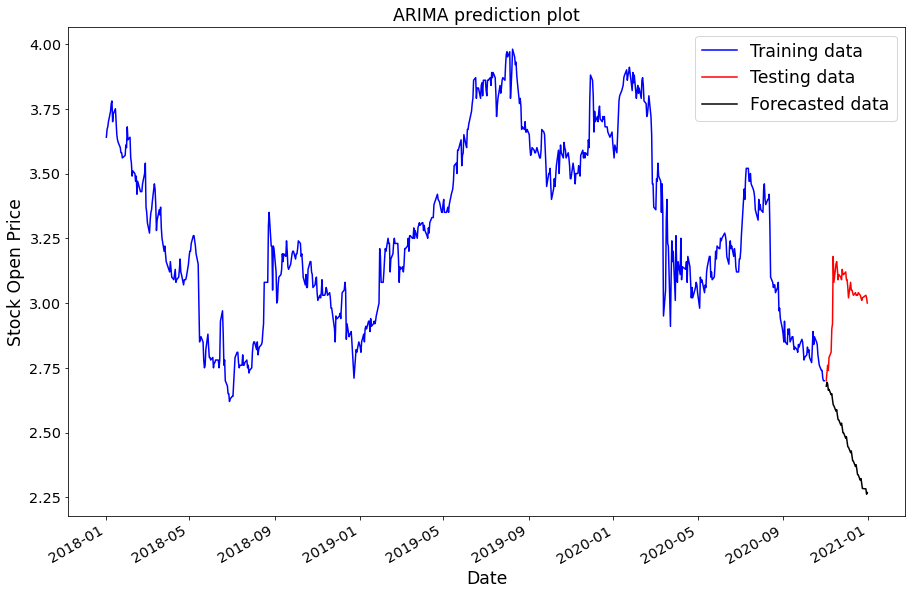

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
from datetime import datetime

##Splitting the dataset into training and validation set
arima_training_set = dataset[dataset['Date']<'2020-11-01'].copy()#Separate the dataset based on date
arima_validation_set = dataset[dataset['Date']>='2020-11-01'].copy()#Testing dataset
#print(arima_training_set)
print("Training set shape:" +str(arima_training_set.shape))
print("Validation set shape:"+ str(arima_validation_set.shape))
arima_training_set1 = arima_training_set.copy()
arima_validation_set1 = arima_validation_set.copy()
##Selecting only the Open column because ARIMA cannot work with multi-dimension
arima_training_set = arima_training_set[['Open']]
arima_validation_set = arima_validation_set[['Open']]


###ARIMA model training
model = auto_arima(arima_training_set, start_p=1, start_q=1,max_p=1, max_q=1, m=5,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(arima_training_set)

##Predict the next n days
arima_forecast = model.predict(n_periods=arima_validation_set.shape[0])
arima_forecast = pd.DataFrame(arima_forecast,index = arima_validation_set.index,columns=['Prediction'])
rms=np.sqrt(np.mean(np.power((np.array(arima_validation_set)-np.array(arima_forecast['Prediction'])),2)))

print("The root mean squared error for prediction in ARIMA is:" + str(rms))
print("The mean squared error for prediction in ARIMA is: "+ str(mean_squared_error(arima_validation_set, arima_forecast['Prediction'])))


fig, ax = plt.subplots(figsize=(15,10))
print(arima_training_set1['Date'])
ax.plot(arima_training_set1['Date'],arima_training_set['Open'], color='blue',label='Training data')
ax.plot(arima_validation_set1['Date'],arima_validation_set['Open'],color='red',label='Testing data')
ax.plot(arima_validation_set1['Date'],arima_forecast['Prediction'],color='black',label='Forecasted data')
ax.xaxis_date()# interpret the x-axis values as dates
fig.autofmt_xdate()# make space for and rotate the x-axis tick labels
ax.set_xlabel('Date',fontsize='xx-large')
ax.set_ylabel('Stock Open Price',fontsize='xx-large')
ax.set_title('ARIMA prediction plot',fontsize='xx-large')
#ax.set_xticks(fontsize='x-large')
#ax.set_yticks(fontsize='x-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
ax.legend(fontsize="xx-large")
plt.show()

**PROPHET**

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The root mean squared error for the Prophet model is:0.43942837804185353
The mean squared error for the Prophet model is:0.19309729942849413


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



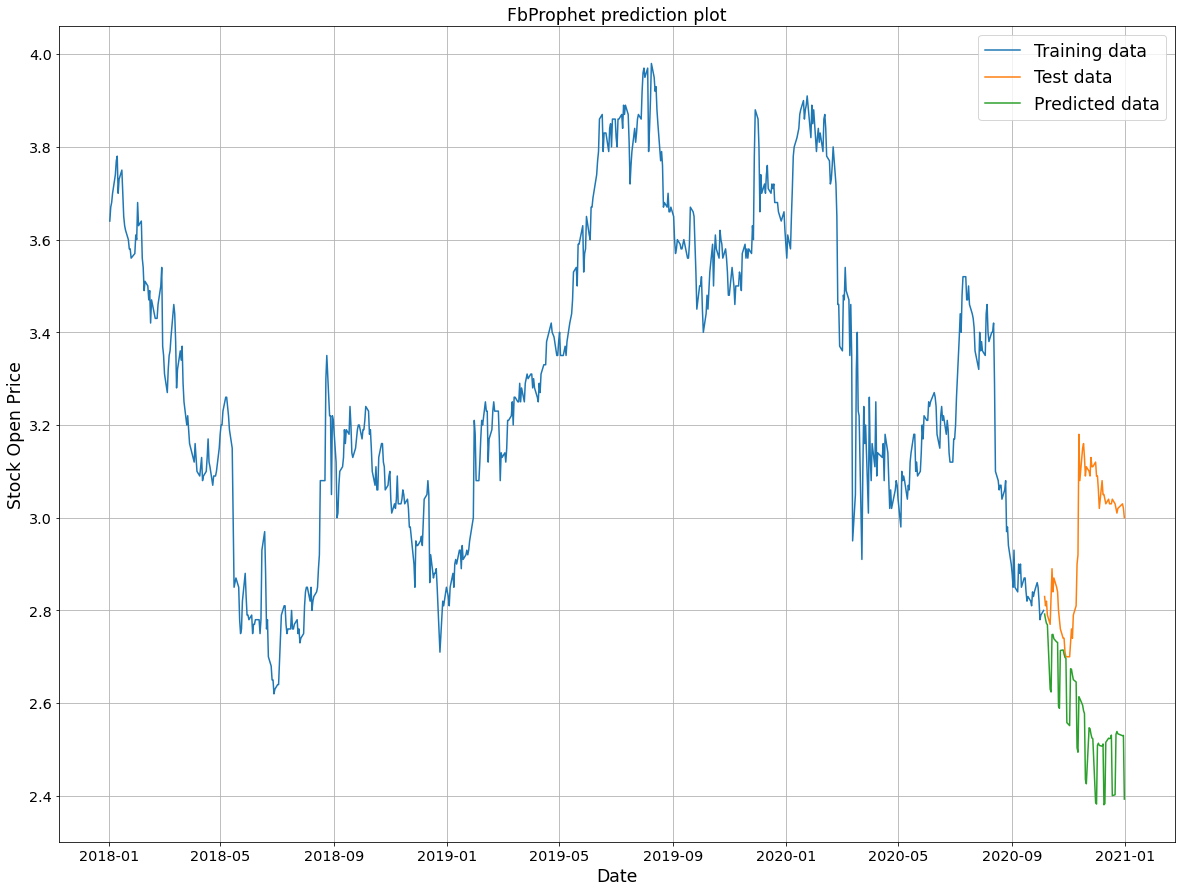

In [ ]:
from fbprophet import Prophet

prophet_data = pd.DataFrame(index=range(0,len(dataset)),columns=['Date', 'Open'])##Select the data only with date and open
prophet_data1 = dataset.sort_index(ascending=True, axis=0)
for i in range(0,len(prophet_data1)):
    prophet_data['Date'][i] = prophet_data1['Date'][i]
    prophet_data['Open'][i] = prophet_data1['Open'][i]

prophet_data['Date'] = pd.to_datetime(prophet_data.Date,format='%Y-%m-%d')##Converting the date to a datetime object

##Setting up the prophet model into the required set
prophet_data.index = prophet_data['Date']
prophet_data.rename(columns={'Open': 'y', 'Date': 'ds'}, inplace=True)

##Splitting the dataset into training and validation set
prophet_train = prophet_data[:700]
prophet_valid = prophet_data[700:]

##Training the prophet model
model = Prophet()
model.fit(prophet_train)

#Predictions
prediction_Dates = model.make_future_dataframe(periods=len(prophet_valid))##Create the next date time for the predictions
prophet_forecast = model.predict(prediction_Dates)


#Calculation of the rmse and mse 
prophet_forecast = prophet_forecast['yhat'][700:]
rms=np.sqrt(np.mean(np.power((np.array(prophet_valid['y'])-np.array(prophet_forecast)),2)))

print("The root mean squared error for the Prophet model is:" +str(rms))
print("The mean squared error for the Prophet model is:"+ str(mean_squared_error(prophet_valid['y'], prophet_forecast)))

#Plotting the data
prophet_valid['Predictions'] = 0
prophet_valid['Predictions'] = prophet_forecast.values

plt.figure(figsize=[20,15])
plt.grid(True)
plt.plot(prophet_train['y'],label='Training data')
plt.plot(prophet_valid['y'],label='Test data')
plt.plot(prophet_valid['Predictions'],label='Predicted data')
plt.xlabel('Date',fontsize='xx-large')
plt.ylabel('Stock Open Price',fontsize='xx-large')
plt.title('FbProphet prediction plot',fontsize='xx-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.legend(fontsize="xx-large")
plt.show()